In [ ]:
from google.colab import drive
import os,sys
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장

# 이미 심볼릭 링크가 존재하는지 확인
if os.path.islink(my_path):
    os.unlink(my_path)  # 기존 심볼릭 링크 삭제

os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

#현재 폴더 경로 지정
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI/Ch09')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 9-1

In [ ]:
import numpy as np

# 다중 손잡이 밴딧 문제 설정
arms_profit=[0.4, 0.12, 0.52, 0.6, 0.25]
n_arms=len(arms_profit)

n_trial=10000 # 손잡이를 당기는 횟수(에피소드 길이)

# 손잡이 당기는 행위를 시뮬레이션하는 함수(handle은 손잡이 번호)
def pull_bandit(handle):
    q=np.random.random()
    if q<arms_profit[handle]:
        return 1
    else:
        return -1

# 랜덤 정책을 모방하는 함수
def random_exploration():
    episode=[]
    num=np.zeros(n_arms) # 손잡이별로 당긴 횟수
    wins=np.zeros(n_arms) # 손잡이별로 승리 횟수
    for i in range(n_trial):
        h=np.random.randint(0,n_arms)
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode, (num,wins)

e,r=random_exploration()

print("손잡이별 승리 확률:", ["%6.4f"% (r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
print("손잡이별 수익($):",["%d"% (2*r[1][i]-r[0][i]) for i in range(n_arms)])
print("순 수익($):",sum(np.asarray(e)[:,1]))

# ε-탐욕을 구현하는 함수
def epsilon_greedy(eps):
    episode=[]
    num=np.zeros(n_arms) # 손잡이별로 당긴 횟수
    wins=np.zeros(n_arms) # 손잡이별로 승리 횟수
    for i in range(n_trial):
        r=np.random.random()
        if(r<eps or sum(wins)==0): # 확률 eps로 임의 선택
            h=np.random.randint(0,n_arms)
        else:
            prob=np.asarray([wins[i]/num[i] if num[i]>0 else 0.0 for i in range(n_arms)])
            prob=prob/sum(prob)
            #h=np.random.choice(range(n_arms),p=prob)
            h=np.argmax(prob)
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode, (num,wins)

e,r=epsilon_greedy(0.1)

print("손잡이별 승리 확률:", ["%6.4f"% (r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
print("손잡이별 수익($):",["%d"% (2*r[1][i]-r[0][i]) for i in range(n_arms)])
print("순 수익($):",sum(np.asarray(e)[:,1]))

손잡이별 승리 확률: ['0.3901', '0.1107', '0.5234', '0.5738', '0.2436']
손잡이별 수익($): ['-447', '-1590', '97', '280', '-1002']
순 수익($): -2662
손잡이별 승리 확률: ['0.4159', '0.1091', '0.5627', '0.5978', '0.2477']
손잡이별 수익($): ['-38', '-172', '35', '1773', '-108']
순 수익($): 1490


# 9-2

Discrete(16)
Discrete(4)
[[3, 0.0, 0], [3, 0.0, 0], [2, 0.0, 1], [0, 0.0, 0], [3, 0.0, 0], [2, 0.0, 1], [2, 0.0, 2], [0, 0.0, 1], [3, 0.0, 1], [1, 0.0, 5]]
[[0, 0.0, 0], [2, 0.0, 1], [2, 0.0, 2], [0, 0.0, 1], [3, 0.0, 1], [3, 0.0, 1], [3, 0.0, 1], [2, 0.0, 2], [1, 0.0, 6], [1, 0.0, 10], [1, 0.0, 14], [2, 1.0, 15]]


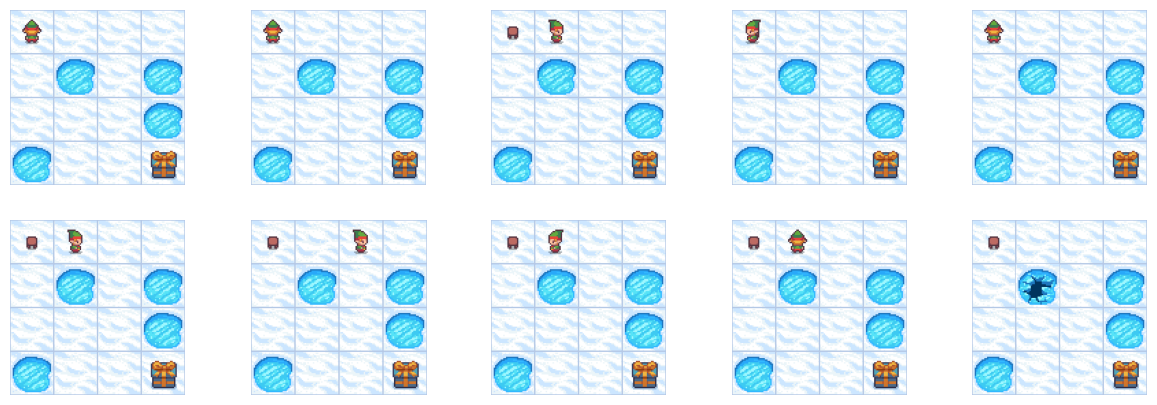

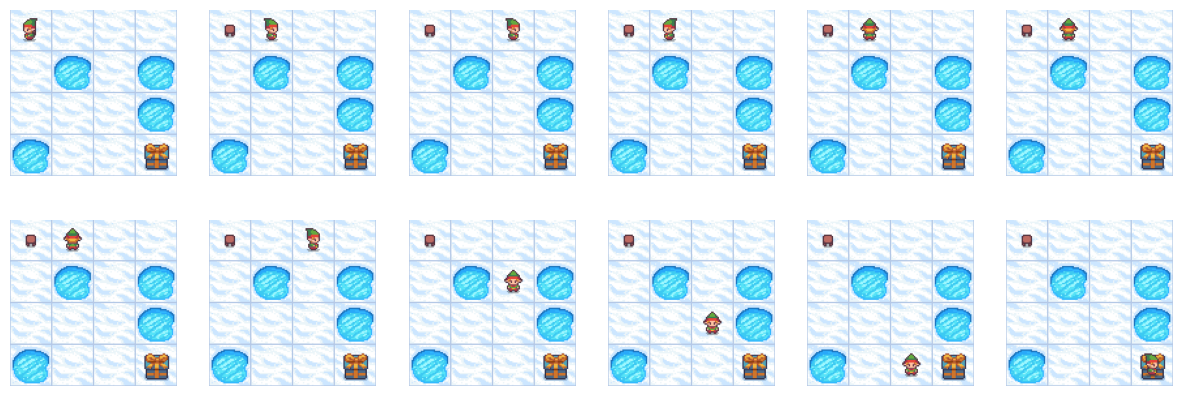

In [12]:
import gym
import matplotlib.pyplot as plt

# 환경 불러오기
env=gym.make("FrozenLake-v1",is_slippery=False,render_mode='rgb_array')
print(env.observation_space)
print(env.action_space)

n_trial = 20


# 에피소드 수집
env.reset()
episode=[]
output_image=[]

for i in range(n_trial):
    action=env.action_space.sample() # 행동을 취함(랜덤 선택)
    obs,reward,done,truncated,info=env.step(action) # 보상을 받고 상태가 바뀜
    episode.append([action,reward,obs])
    output_image.append(env.render())
    if done or truncated:
        break

print(episode)
env.close()


# Create a new figure
plt.figure(figsize=(15, 5))

# Display each image in a row
for i, img in enumerate(output_image):
    plt.subplot(2, (len(output_image)+1)//2, i+1)
    plt.imshow(img)
    plt.axis('off')
    
# 100개의 에피소드에서 목적지에 도착하는 경우 중단
for episode in range(100):
    env.reset() 
    episode=[] #에피소드 초기화
    output_image=[] #output_image 초기화
    reward=0
    for i in range(n_trial):
        action=env.action_space.sample() # 행동을 취함(랜덤 선택)
        obs,reward,done,truncated,info=env.step(action) # 보상을 받고 상태가 바뀜
        episode.append([action,reward,obs])
        output_image.append(env.render())
        if done or truncated:
            break
    if reward:
        break

print(episode)
env.close()

# Create a new figure
plt.figure(figsize=(15, 5))

# Display each image in a row
for i, img in enumerate(output_image):
    plt.subplot(2, (len(output_image)+1)//2, i+1)
    plt.imshow(img)
    plt.axis('off')

# 9-3

In [10]:
import gym
import numpy as np

env=gym.make('FrozenLake-v1',is_slippery=False) # 환경 생성
Q=np.zeros([env.observation_space.n,env.action_space.n]) # Q 배열 초기화

rho=0.8 # 학습률
lamda=0.99 # 할인율

n_episode=2000
length_episode=100

# 환경 불러오기
env=gym.make("FrozenLake-v1",is_slippery=False) # 환경 생성
Q=np.zeros([env.observation_space.n,env.action_space.n]) # Q 배열 초기화

# 최적 행동 가치 함수 찾기
for i in range(n_episode):
    s=env.reset() # 새로운 에피소드 시작
    s=s[0]
    for j in range(length_episode):
        argmaxs=np.argwhere(Q[s,:]==np.max(Q[s,:])).flatten().tolist()
        a=np.random.choice(argmaxs)
        s1,r,done,truncated,_=env.step(a)
        Q[s,a]=Q[s,a]+rho*(r+lamda*np.max(Q[s1,:])-Q[s,a]) # 식 (9.18)
        s=s1
        if done or truncated:
            break
           

np.set_printoptions(precision=2)
print(Q)

[[0.   0.   0.95 0.  ]
 [0.   0.   0.96 0.  ]
 [0.   0.97 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.99 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.79 0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   0.  ]]


# 9-4

In [11]:
import gym
import numpy as np

env=gym.make('FrozenLake-v1',is_slippery=False) # 환경 생성
Q=np.zeros([env.observation_space.n,env.action_space.n]) # Q 배열 초기화

rho=0.90 # 학습률
lamda=0.99 # 할인율
eps=1.0 # 엡시론
eps_decay=0.999 # 삭감 비율

n_episode=3000
length_episode=100

# 최적 행동 가치 함수 찾기(탐사와 탐험의 균형 추구)
for i in range(n_episode):
    s=env.reset() # 새로운 에피소드 시작
    s=s[0]
    for j in range(length_episode):
        r=np.random.random()
        eps=max(0.01,eps*eps_decay) # 엡시론을 조금씩 줄여나감
        if(r<eps): # eps 비율만큼 임의 선택
            a=np.random.randint(0,env.action_space.n)
        else:
            argmaxs=np.argwhere(Q[s,:]==np.max(Q[s,:])).flatten().tolist()
            a=np.random.choice(argmaxs)
        # s1,r,done,_=env.step(a)
        s1,r,done,truncated,_=env.step(a)
        # print(s, s1, r, Q)
        Q[s,a]=Q[s,a]+rho*(r+lamda*np.max(Q[s1,:])-Q[s,a])
        s=s1
        if done or truncated:
            break
    

np.set_printoptions(precision=2)
print(Q)

[[0.94 0.95 0.93 0.94]
 [0.94 0.   0.   0.  ]
 [0.   0.78 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.95 0.96 0.   0.94]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.96 0.   0.97 0.95]
 [0.96 0.96 0.98 0.  ]
 [0.97 0.99 0.   0.97]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.89 0.97]
 [0.96 0.99 1.   0.98]
 [0.   0.   0.   0.  ]]


# 9-5

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


1/1 [==============================] - 0s 86ms/step
0 번째 에피소드의 점수: 16.0
1/1 [==============================] - 0s 31ms/step
1 번째 에피소드의 점수: 12.0
1/1 [==============================] - 0s 35ms/step
2 번째 에피소드의 점수: 24.0
1/1 [==============================] - 0s 43ms/step
3 번째 에피소드의 점수: 43.0
1/1 [==============================] - 0s 31ms/step
4 번째 에피소드의 점수: 13.0
1/1 [==============================] - 0s 89ms/step
5 번째 에피소드의 점수: 17.0
1/1 [==============================] - 0s 22ms/step
6 번째 에피소드의 점수: 12.0
1/1 [==============================] - 0s 23ms/step
7 번째 에피소드의 점수: 12.0
1/1 [==============================] - 0s 29ms/step
8 번째 에피소드의 점수: 27.0
2/2 [==============================] - 0s 9ms/step


<ipython-input-16-47f733f32c91>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mini_batch=np.asarray(random.sample(D,batch_siz))


2/2 [==============================] - 0s 7ms/step
9 번째 에피소드의 점수: 12.0
2/2 [==============================] - 0s 5ms/step
10 번째 에피소드의 점수: 8.0
2/2 [==============================] - 0s 7ms/step
11 번째 에피소드의 점수: 41.0
2/2 [==============================] - 0s 5ms/step
12 번째 에피소드의 점수: 94.0
2/2 [==============================] - 0s 5ms/step
13 번째 에피소드의 점수: 44.0
2/2 [==============================] - 0s 7ms/step
14 번째 에피소드의 점수: 33.0
2/2 [==============================] - 0s 8ms/step
15 번째 에피소드의 점수: 29.0
2/2 [==============================] - 0s 5ms/step
16 번째 에피소드의 점수: 35.0
2/2 [==============================] - 0s 9ms/step
17 번째 에피소드의 점수: 20.0
2/2 [==============================] - 0s 9ms/step
18 번째 에피소드의 점수: 31.0
2/2 [==============================] - 0s 6ms/step
19 번째 에피소드의 점수: 31.0
2/2 [==============================] - 0s 10ms/step
20 번째 에피소드의 점수: 11.0
2/2 [==============================] - 0s 9ms/step
21 번째 에피소드의 점수: 21.0
2/2 [==============================] - 0s 6ms/step
22 번째 에피소드의 점수

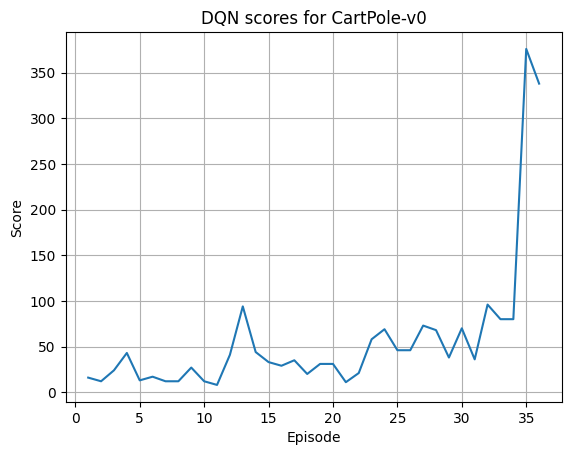

In [ ]:
import numpy as np
import random
import gym
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque

# 하이퍼 매개변수 설정
rho=0.9 # 학습률
lamda=0.99 # 할인율
eps=0.9
eps_decay=0.999
batch_siz=64
n_episode=100

# 신경망을 설계해주는 함수
def deep_network():
    mlp=Sequential()
    mlp.add(Dense(32,input_dim=env.observation_space.shape[0],activation='relu'))
    mlp.add(Dense(32,activation='relu'))
    mlp.add(Dense(env.action_space.n,activation='linear'))
    mlp.compile(loss='mse',optimizer='Adam')
    return mlp

# DQN 학습
def model_learning():
    mini_batch=np.asarray(random.sample(D,batch_siz))
    state=np.asarray([mini_batch[i,0] for i in range(batch_siz)])
    action=mini_batch[:,1]
    reward=mini_batch[:,2]
    state1=np.asarray([mini_batch[i,3] for i in range(batch_siz)])
    done=mini_batch[:,4]

    target=model.predict(state)
    target1=model.predict(state1)

    for i in range(batch_siz):
        if done[i]:
            target[i][action[i]]=reward[i]
        else:
            target[i][action[i]]+=rho*((reward[i]+lamda*np.amax(target1[i]))-target[i][action[i]]) # Q 러닝(식 (9.19))
    model.fit(state,target,batch_size=batch_siz,epochs=1,verbose=0)

env=gym.make("CartPole-v0")

model=deep_network() # 신경망 생성
D=deque(maxlen=2000) # 리플레이 메모리 초기화
scores=[]
max_steps=env.spec.max_episode_steps

# 신경망 학습
for i in range(n_episode):
    s=env.reset()[0]
    long_reward=0

    while True:
        r=np.random.random()
        eps=max(0.01,eps*eps_decay) # 엡시론을 조금씩 줄여나감
        if(r<eps):
            a=np.random.randint(0,env.action_space.n) # 랜덤 정책
        else:
            q=model.predict(np.reshape(s,[1,4])) # 신경망이 예측한 행동
            a=np.argmax(q[0])
        
        s1,r,done,truncated,_=env.step(a)
        if (done or truncated) and long_reward<max_steps-1: # 실패
            r=-100
        D.append((s,a,r,s1,done))

        if len(D)>batch_siz*3:
            model_learning()

        s=s1
        long_reward+=r
        
        if done:
            long_reward=long_reward if long_reward==max_steps else long_reward+100
            print(i,"번째 에피소드의 점수:",long_reward)
            scores.append(long_reward)
            break

    if i>10 and np.mean(scores[-5:])>(0.95*max_steps):
        break
    
# 신경망 저장
model.save("./cartpole_by_DQN.h5")
env.close()

import matplotlib.pyplot as plt

plt.plot(range(1,len(scores)+1),scores)
plt.title('DQN scores for CartPole-v0')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid()
plt.show()

9-6

1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


1/1 [==============================] - 0s 23ms/step
에피소드의 점수: 180.0


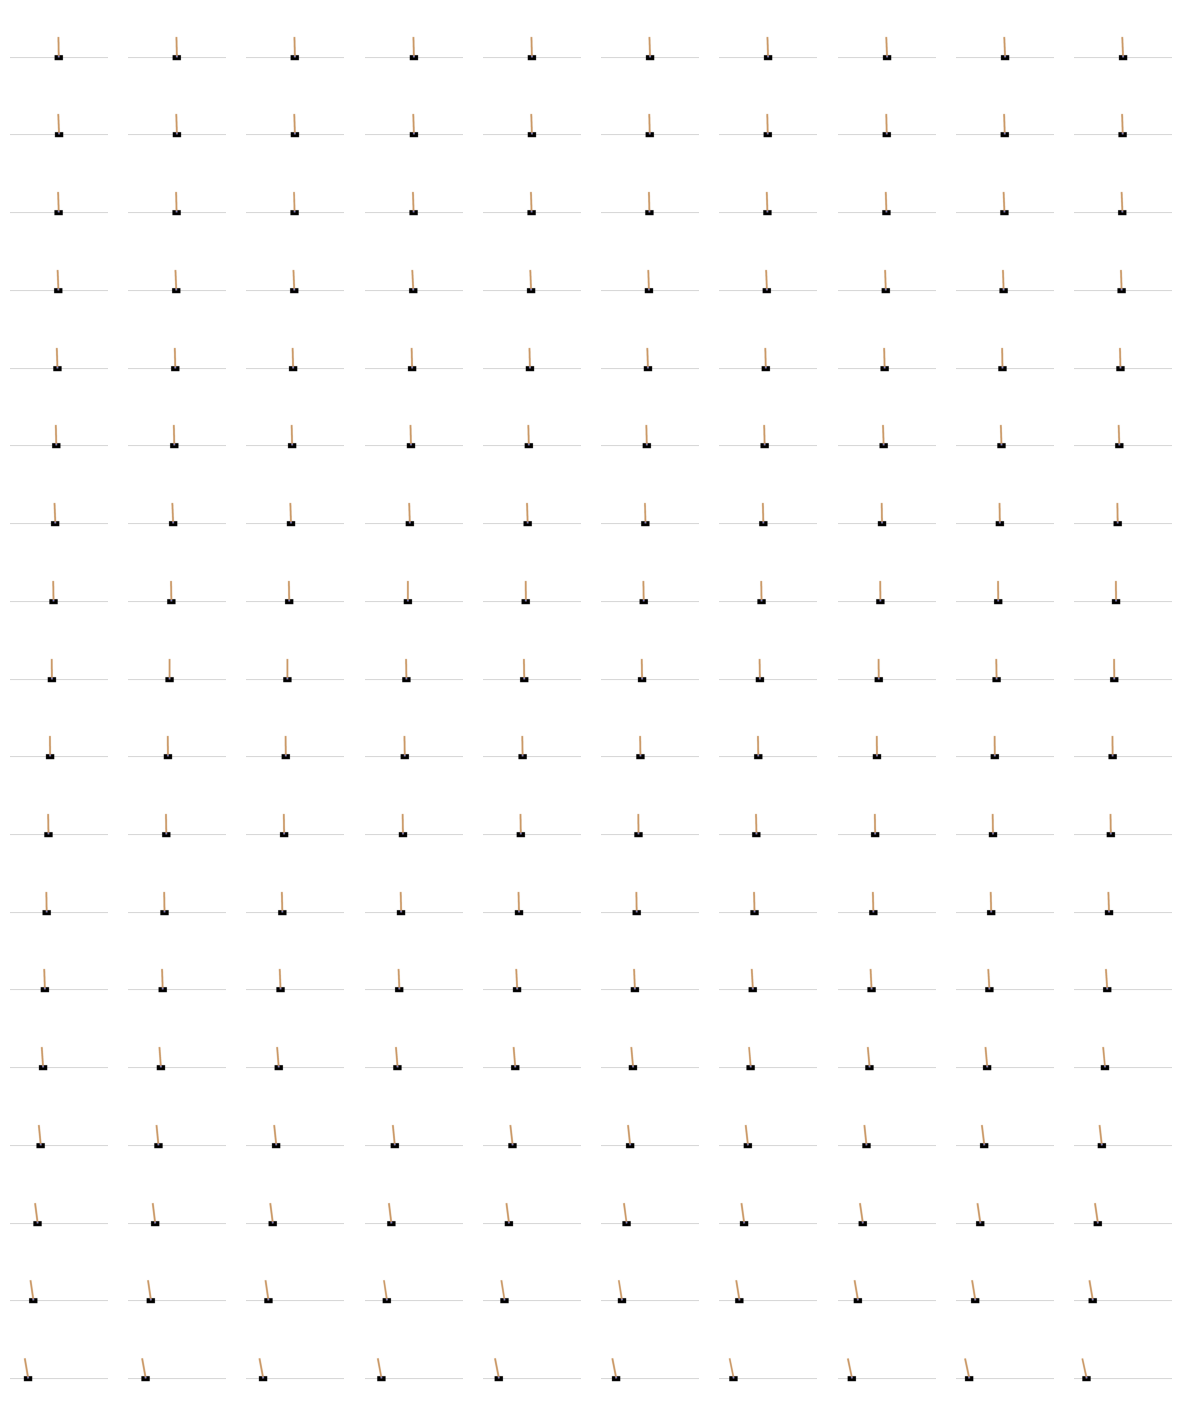

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np
import gym
import time




# 신경망 블러옴
model=load_model('./cartpole_by_DQN.h5')

env=gym.make("CartPole-v0", render_mode='rgb_array')
long_reward=0
output_image=[]

# CartPole 플레이
s=env.reset()[0]
while True:
    q=model.predict(np.reshape(s,[1,4])) # 신경망이 예측한 행동
    a=np.argmax(q[0])
    s1,r,done,truncated,_=env.step(a)
    s=s1
    long_reward+=r
    
    

    output_image.append(env.render())
    time.sleep(0.02)

    if done or truncated:
        print("에피소드의 점수:",long_reward)
        break

env.close()
import matplotlib.pyplot as plt
# Create a new figure
plt.figure(figsize=(15, long_reward//10))

# Display each image in a row
for i, img in enumerate(output_image):
    plt.subplot((len(output_image)-1)//10+1, 10, i+1)
    plt.imshow(img)
    plt.axis('off')